<a href="https://colab.research.google.com/github/rohitpaul23/kaggleAssign/blob/main/tmdbBoxOfficePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMDB Box Office Prediction

In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

Here, we're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release

In this dataset, we are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

We are predicting the worldwide revenue for 4398 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

In [2]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

     |████████████████████████████████| 15.2 MB 17.4 MB/s 
     |████████████████████████████████| 95 kB 2.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [3]:
!pip install pandas numpy matplotlib seaborn --quiet

In [4]:
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/competitions/tmdb-box-office-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohitpaul23
Your Kaggle Key: ··········


100%|██████████| 17.4M/17.4M [00:00<00:00, 46.6MB/s]



Extracting archive ./tmdb-box-office-prediction/tmdb-box-office-prediction.zip to ./tmdb-box-office-prediction


In [6]:
import os

os.listdir('tmdb-box-office-prediction')

['train.csv', 'sample_submission.csv', 'test.csv']

In [7]:
import pandas as pd

train_df = pd.read_csv('tmdb-box-office-prediction/train.csv')
test_df = pd.read_csv('tmdb-box-office-prediction/test.csv')
sample_submission_df = pd.read_csv('tmdb-box-office-prediction/sample_submission.csv')

In [8]:
train_df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www

In [9]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [10]:
m = train_df.shape[0]
n = train_df.shape[1]
m, n

(3000, 23)

In [11]:
  train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

## Feature Engineering

Features like 'belongs_to_collection', 'imdb_id', 'poster_path' does not help us get the revenue whereas features like 'original_title', 'overview', 'tagline' requires nlp.

Features such as 'budget', 'popularity' and 'runtime' can be used at it is with normalization, whereas for 'release date' need to be converted into date-time format.

And for other categorical features one-hot encoding can be performed

In [12]:
import numpy as np
import re

### Dealing with the Categorical attributes

**GENRES**

In [13]:
def get_genre(df, entry):
  row = df.iloc[entry]['genres']
  if row is not np.nan:
    alist = list(map(str.strip, re.split("'|[|]|{|}|,|:|\t", row[1:-1])))
    newList = [ele for ele in alist if ele]
    return newList[3::4]
  else:
    return []

In [14]:
def get_all_genres():
  emb_features = []
  for entry in range(m):
    alist = get_genre(train_df, entry)
    for ele in alist:
      if ele not in emb_features:
        emb_features.append(ele)
  return emb_features

In [15]:
genres = get_all_genres()
genres

['Comedy',
 'Drama',
 'Family',
 'Romance',
 'Thriller',
 'Action',
 'Animation',
 'Adventure',
 'Horror',
 'Documentary',
 'Music',
 'Crime',
 'Science Fiction',
 'Mystery',
 'Foreign',
 'Fantasy',
 'War',
 'Western',
 'History',
 'TV Movie']

In [16]:
genre_len = len(genres)

In [17]:
genre_train_df = pd.DataFrame(columns = genres, dtype = np.int64) 
genre_test_df = pd.DataFrame(columns = genres, dtype = np.int64) 

In [18]:
def fill_genre_df(df, genre_df):
  no_of_rows = df.shape[0]
  for entry in range(no_of_rows):
    row_genres = get_genre(df, entry)
    row_list = []
    for index in genres:
      if index in row_genres:
        row_list.append(1)
      else:
        row_list.append(0) 
    genre_df.loc[entry] = row_list

In [19]:
fill_genre_df(train_df, genre_train_df)
fill_genre_df(test_df, genre_test_df)

In [20]:
train_df = pd.concat([train_df, genre_train_df], axis = 1)
test_df = pd.concat([test_df, genre_test_df], axis = 1)

**HOMEPAGE**

In [21]:
def get_homepage_avail(df):
  homepage_avail = []
  for ele in df['homepage']: 
    if ele:
      homepage_avail.append(1)
    else:
      homepage_avail.append(0)
  return homepage_avail

In [22]:
train_homepage_list = get_homepage_avail(train_df)
test_homepage_list = get_homepage_avail(test_df)

In [23]:
homepage_train_df = pd.DataFrame(train_homepage_list, columns = ['homepage_avail'], dtype = np.int64)
homepage_test_df = pd.DataFrame(test_homepage_list, columns = ['homepage_avail'], dtype = np.int64)

In [24]:
train_df = pd.concat([train_df, homepage_train_df], axis = 1)
test_df = pd.concat([test_df, homepage_test_df], axis = 1)

**PRODUCTION COMPANY**

In [25]:
prod_companies = []
for entry in range(m):
  row = train_df.iloc[entry]['production_companies']
  if row is not np.nan:
    alist = list(map(str.strip, re.split("'|[|]|{|}|,|:|\t", row[1:-1])))
    newList = [ele for ele in alist if ele]
    #print(newList)
    for ele in newList[1::4]:
      if ele not in prod_companies:
        prod_companies.append(ele)

In [26]:
len(prod_companies)


3646

Their are total of 3646 production companies which will lead to 3646 features by one-hot encoding which is not feasible to have as number of instances is 3000.

Hence using num of production associated with a movie

In [27]:
def get_no_prod_company(df, entry):
  row = df.iloc[entry]['production_companies']
  if row is not np.nan:
    alist = list(map(str.strip, re.split("'|[|]|{|}|,|:|\t", row[1:-1])))
    newList = [ele for ele in alist if ele]
    return len(newList[1::4])
  else:
    return 0

In [28]:
def get_all_no_of_prod_company(df):
  no_prod_companies = []
  no_of_rows = df.shape[0]
  for entry in range(no_of_rows):
    num_ = get_no_prod_company(df, entry)
    no_prod_companies.append(num_)
  return no_prod_companies

In [29]:
train_no_prod_companies = get_all_no_of_prod_company(train_df)
test_no_prod_companies = get_all_no_of_prod_company(test_df)

In [30]:
prod_train_df = pd.DataFrame(train_no_prod_companies, columns = ['prod_company'], dtype = np.float64)
prod_test_df = pd.DataFrame(test_no_prod_companies, columns = ['prod_company'], dtype = np.float64)

In [31]:
train_df = pd.concat([train_df, prod_train_df], axis = 1)
test_df = pd.concat([test_df, prod_test_df], axis = 1)

**PRODUCTION COUNTRIES**

In [32]:
def get_country(df, entry):
  row = df.iloc[entry]['production_countries']
  if row is not np.nan:
    alist = list(map(str.strip, re.split("'|[|]|{|}|,|:|\t", row[1:-1])))
    newList = [ele for ele in alist if ele]
    return newList[3::4]
  else:
    return []

In [33]:
def get_all_countries():
  emb_features = []
  for entry in range(m):
    alist = get_country(train_df, entry)
    for ele in alist:
      if ele not in emb_features:
        emb_features.append(ele)
  return emb_features

In [34]:
prod_countries = get_all_countries()
prod_countries

['United States of America',
 'India',
 'South Korea',
 'Canada',
 'Serbia',
 'United Kingdom',
 'Austria',
 'Germany',
 'France',
 'New Zealand',
 'Japan',
 'Ireland',
 'Italy',
 'Israel',
 'Belgium',
 'Czech Republic',
 'China',
 'Brazil',
 'Argentina',
 'Chile',
 'Peru',
 'Hong Kong',
 'Russia',
 'Spain',
 'Turkey',
 'Australia',
 'Sweden',
 'Luxembourg',
 'South Africa',
 'Switzerland',
 'Iran',
 'Morocco',
 'Netherlands',
 'Philippines',
 'Iceland',
 'Denmark',
 'Taiwan',
 'Mongolia',
 'Hungary',
 'Mexico',
 'Romania',
 'Greece',
 'United Arab Emirates',
 'Puerto Rico',
 'Finland',
 'Cambodia',
 'Norway',
 'Poland',
 'Malta',
 'Namibia',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro',
 'Pakistan',
 'Algeria',
 'Ethiopia',
 'Qatar',
 'Tunisia',
 'Portugal',
 'Bulgaria',
 'Slovenia',
 'Ukraine',
 'Saudi Arabia',
 'Jordan',
 'Croatia',
 'Singapore',
 'Cyprus',
 'Uruguay',
 'Paraguay',
 'Mauritania',
 'Costa Rica',
 'Bahamas',
 'Burkina Faso',
 'Ghana',
 'Indonesia']

In [35]:
prod_country_len = len(prod_countries)

In [36]:
prod_train_country_df = pd.DataFrame(columns = prod_countries, dtype = np.int64)
prod_test_country_df = pd.DataFrame(columns = prod_countries, dtype = np.int64) 

In [37]:
def fill_country_df(df, country_df):
  no_of_rows = df.shape[0]
  for entry in range(no_of_rows):
    row_country = get_country(df, entry)
    row_list = []
    for index in prod_countries:
      if index in row_country:
        row_list.append(1)
      else:
        row_list.append(0) 
    country_df.loc[entry] = row_list

In [38]:
fill_country_df(train_df, prod_train_country_df)
fill_country_df(test_df, prod_test_country_df)

In [39]:
train_df = pd.concat([train_df, prod_train_country_df], axis = 1)
test_df = pd.concat([test_df, prod_test_country_df], axis = 1)

**LANGUAGE**

In [40]:
def get_language(df, entry):
  row = df.iloc[entry]['spoken_languages']
  if row is not np.nan:
    alist = list(map(str.strip, re.split("'|[|]|{|}|,|:|\t", row[1:-1])))
    newList = [ele for ele in alist if ele]
    row_lang = []
    tag = 0
    for ele in newList:
      if tag == 1:
        tag = 0
        row_lang.append(ele)
      if ele == 'iso_639_1':
        tag = 1
    return row_lang
  else:
    return []

In [41]:
def get_all_languages():
  emb_features = []
  for entry in range(m):
    alist = get_language(train_df, entry)
    for ele in alist:
      if ele not in emb_features:
        emb_features.append(ele)
  return emb_features

In [42]:
lang = get_all_languages()

In [43]:
lang_len = len(lang)

In [44]:
lang_train_df = pd.DataFrame(columns = lang, dtype = np.int64)
lang_test_df = pd.DataFrame(columns = lang, dtype = np.int64) 

In [45]:
def fill_language_df(df, lang_df):
  no_of_rows = df.shape[0]
  for entry in range(no_of_rows):
    row_lang = get_language(df, entry)
    row_list = []
    for index in lang:
      if index in row_lang:
        row_list.append(1)
      else:
        row_list.append(0) 
    lang_df.loc[entry] = row_list

In [46]:
fill_language_df(train_df, lang_train_df)
fill_language_df(test_df, lang_test_df)

In [47]:
train_df = pd.concat([train_df, lang_train_df], axis = 1)
test_df = pd.concat([test_df, lang_test_df], axis = 1)

**KEYWORDS**

Their are total of 7325 production companies which will lead to 7325 features by one-hot encoding which is not feasible to have as number of instances is 3000.

Hence using num of keywords associated with a movie

In [48]:
def get_no_keyword(df, entry):
  row = df.iloc[entry]['Keywords']
  if row is not np.nan:
    alist = list(map(str.strip, re.split("'|[|]|{|}|,|:|\t", row[1:-1])))
    newList = [ele for ele in alist if ele]
    return len(newList[1::4])
  else:
    return 0

In [49]:
def get_all_no_keywords(df):
  no_keywords = []
  no_of_rows = df.shape[0]
  for entry in range(no_of_rows):
    num_ = get_no_keyword(df, entry)
    no_keywords.append(num_)
  return no_keywords

In [50]:
train_no_keywords = get_all_no_keywords(train_df)
test_no_keywords = get_all_no_keywords(test_df)

In [51]:
key_train_df = pd.DataFrame(train_no_keywords, columns = ['new_keywords'], dtype = np.float64)
key_test_df = pd.DataFrame(test_no_keywords, columns = ['new_keywords'], dtype = np.float64)

In [52]:
train_df = pd.concat([train_df, key_train_df], axis = 1)
test_df = pd.concat([test_df, key_test_df], axis = 1)

Same Analogy will be applied to **'CAST'** and **'CREW'**

In [53]:
def get_no_cast_crew(df, entry, feature):
  row = df.iloc[entry][feature]
  if row is not np.nan:
    alist = list(map(str.strip, re.split("{", row[1:-1])))
    newList = [ele for ele in alist if ele]
    return len(newList)
  else:
    return 0

In [54]:
def get_all_cast_crew(df, feature):
  no_c = []
  no_of_rows = df.shape[0]
  for entry in range(no_of_rows):
    num_ = get_no_cast_crew(df, entry, feature)
    no_c.append(num_)
  return no_c

In [55]:
train_no_cast = get_all_cast_crew(train_df, 'cast')
test_no_cast = get_all_cast_crew(test_df, 'cast')

In [56]:
train_no_crew = get_all_cast_crew(train_df, 'crew')
test_no_crew = get_all_cast_crew(test_df, 'crew')

In [57]:
cast_train_df = pd.DataFrame(train_no_cast, columns = ['new_cast'], dtype = np.float64)
cast_test_df = pd.DataFrame(test_no_cast, columns = ['new_cast'], dtype = np.float64)

In [58]:
crew_train_df = pd.DataFrame(train_no_crew, columns = ['new_crew'], dtype = np.float64)
crew_test_df = pd.DataFrame(test_no_crew, columns = ['new_crew'], dtype = np.float64)

In [59]:
train_df = pd.concat([train_df, cast_train_df], axis = 1)
test_df = pd.concat([test_df, cast_test_df], axis = 1)

In [60]:
train_df = pd.concat([train_df, crew_train_df], axis = 1)
test_df = pd.concat([test_df, crew_test_df], axis = 1)

Dropping out the old attributes which is being modified into new attributes

In [61]:
old_feature = ['id', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']

In [62]:
train_df.drop(old_feature, axis = 1, inplace=True)


In [63]:
test_df.drop(old_feature, axis = 1, inplace=True)

### Dealing with date-time attributes

**RELEASE DATE**

In [64]:
train_df['release_date'][0]

'2/20/15'

In [65]:
def get_date_features(df):
  df['release_date'] = pd.to_datetime(df['release_date'])
  df['year'] = df['release_date'].dt.year
  df['month'] = df['release_date'].dt.month
  df['day'] = df['release_date'].dt.day
  df['weak_of_year'] = df['release_date'].dt.week

In [66]:
get_date_features(train_df)
get_date_features(test_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [67]:
train_df.drop(['release_date'], axis = 1, inplace=True)
test_df.drop(['release_date'], axis = 1, inplace=True)

### Dealing with Numerical attributes

'id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'

In [68]:
numerical_cols = ['budget', 'popularity', 'runtime', 'new_cast', 'new_crew', 'prod_company', 'new_keywords', 'day', 'month', 'year', 'weak_of_year']

In [69]:
train_df[numerical_cols].isna().sum()

budget          0
popularity      0
runtime         2
new_cast        0
new_crew        0
prod_company    0
new_keywords    0
day             0
month           0
year            0
weak_of_year    0
dtype: int64

In [70]:
test_df[numerical_cols].isna().sum()

budget          0
popularity      0
runtime         4
new_cast        0
new_crew        0
prod_company    0
new_keywords    0
day             1
month           1
year            1
weak_of_year    1
dtype: int64

Only runtime attributes has na value in it

In [71]:
max_runtime = train_df['runtime'].max()

In [72]:
train_df['runtime'] = train_df['runtime'].fillna(max_runtime)
test_df['runtime'] = test_df['runtime'].fillna(max_runtime)

In [73]:
train_df[numerical_cols].isna().sum()

budget          0
popularity      0
runtime         0
new_cast        0
new_crew        0
prod_company    0
new_keywords    0
day             0
month           0
year            0
weak_of_year    0
dtype: int64

Scaling Numeric Inputs

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler().fit(train_df[numerical_cols])

In [76]:
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [77]:
train_df

,budget,popularity,runtime,revenue,Comedy,Drama,Family,Romance,Thriller,Action,...,gu,ku,km,new_keywords,new_cast,new_crew,year,month,day,weak_of_year
0,0.036842,0.022340,0.275148,12314651,1,0,0,0,0,0,...,0,0,0,0.026846,0.153846,0.371134,0.434343,0.090909,0.633333,0.134615
1,0.105263,0.028025,0.334320,95149435,1,1,1,1,0,0,...,0,0,0,0.026846,0.128205,0.046392,0.323232,0.636364,0.166667,0.596154
2,0.008684,0.218457,0.310651,13092000,0,1,0,0,0,0,...,0,0,0,0.080537,0.326923,0.329897,0.424242,0.818182,0.300000,0.769231
3,0.003158,0.010787,0.360947,16000000,0,1,0,0,1,0,...,0,0,0,0.046980,0.044872,0.015464,0.404040,0.181818,0.266667,0.173077
4,0.000000,0.003901,0.349112,3923970,0,0,0,0,1,1,...,0,0,0,0.000000,0.025641,0.010309,0.373737,0.090909,0.133333,0.096154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.033476,0.301775,1596687,1,0,0,1,0,0,...,0,0,0,0.127517,0.096154,0.087629,0.222222,0.272727,0.700000,0.288462
2996,0.000000,0.012666,0.301775,180590,0,1,0,0,0,0,...,0,0,0,0.040268,0.070513,0.077320,0.414141,0.181818,0.900000,0.230769
2997,0.171053,0.049203,0.355030,89456761,0,0,0,0,1,1,...,0,0,0,0.093960,0.096154,0.051546,0.242424,0.818182,0.333333,0.769231
2998,0.110526,0.053427,0.266272,171963386,1,0,0,1,0,0,...,0,0,0,0.147651,0.166667,0.458763,0.323232,0.000000,0.500000,0.038462


In [159]:
final_col = train_df.columns
final_col

Index(['budget', 'popularity', 'runtime', 'revenue', 'Comedy', 'Drama',
       'Family', 'Romance', 'Thriller', 'Action',
       ...
       'gu', 'ku', 'km', 'new_keywords', 'new_cast', 'new_crew', 'year',
       'month', 'day', 'weak_of_year'],
      dtype='object', length=185)

## Training

In [78]:
features = train_df.columns.to_list()

In [79]:
target_feature = ['revenue']
input_features = list(set(features) - set(target_feature))

In [119]:
inputs = train_df[input_features].copy()
test_inputs = test_df[input_features].copy()
targets = train_df[target_feature]

In [81]:
from sklearn.model_selection import train_test_split

In [120]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size = 0.15, random_state = 35)

In [83]:
from xgboost import XGBRegressor

In [84]:
model = XGBRegressor(random_state=35, n_jobs=-1)

In [85]:
model.fit(train_inputs, train_targets)

[11:53:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=35)

In [86]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [87]:
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [88]:
train_rmse = rmse(train_targets, train_preds)
val_rmse = rmse(val_targets, val_preds)

In [89]:
print('Training RMSE Error : ' + str(train_rmse) + ' and Validation RMSE Error : ' + str(val_rmse))

Training RMSE Error : 56794737.00138652 and Validation RMSE Error : 55454450.94530316


In [90]:
train_score = model.score(train_inputs, train_targets)
val_score = model.score(val_inputs, val_targets)

In [91]:
print('Training Score : ' + str(train_score*100) + ' %, and Validation Score : ' + str(val_score*100) + ' %')

Training Score : 84.42558202749733 %, and Validation Score : 63.46392999585155 %


In [92]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

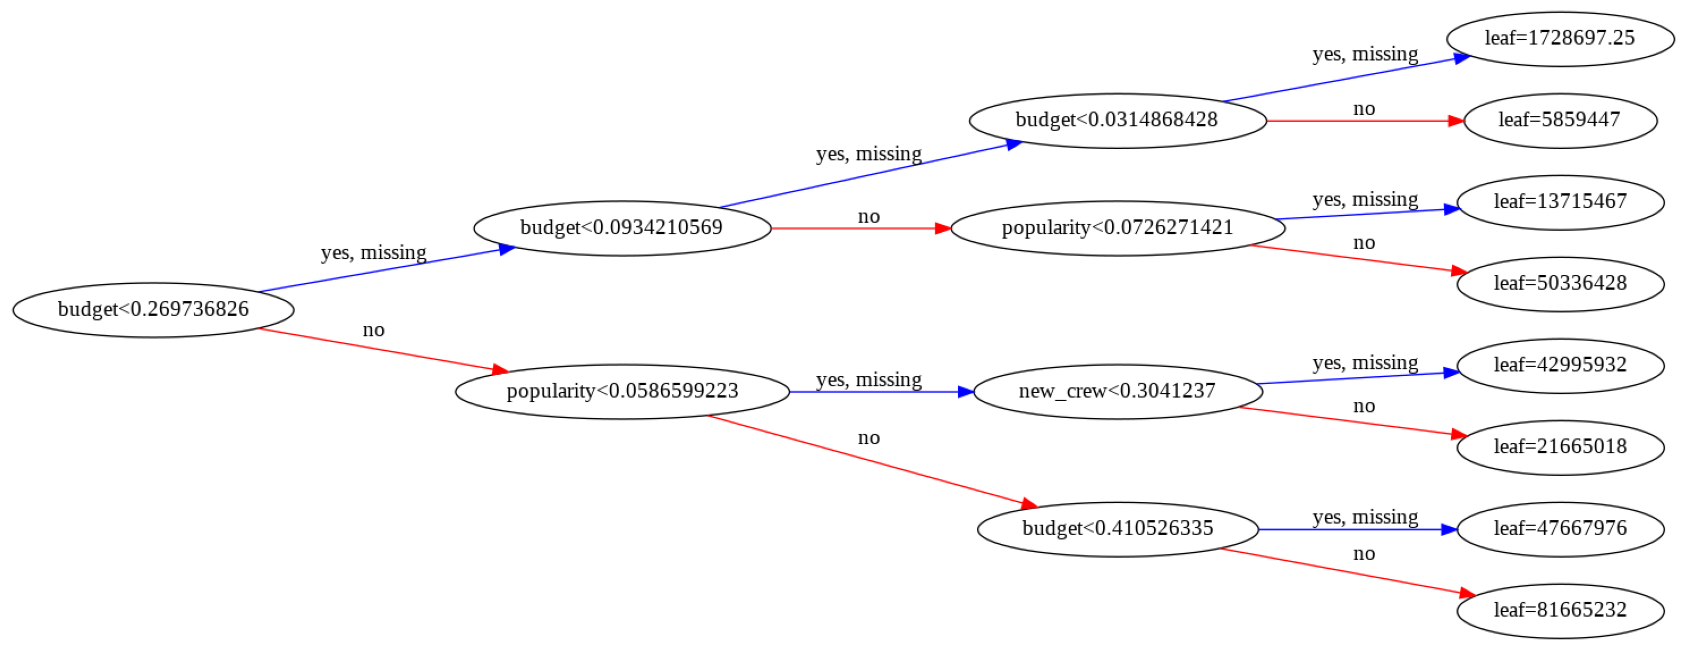

In [93]:
plot_tree(model, rankdir='LR');

In [94]:
trees = model.get_booster().get_dump()

In [95]:
len(trees)

100

In [96]:
print(trees[0])

0:[budget<0.269736826] yes=1,no=2,missing=1
	1:[budget<0.0934210569] yes=3,no=4,missing=3
		3:[budget<0.0314868428] yes=7,no=8,missing=7
			7:leaf=1728697.25
			8:leaf=5859447
		4:[popularity<0.0726271421] yes=9,no=10,missing=9
			9:leaf=13715467
			10:leaf=50336428
	2:[popularity<0.0586599223] yes=5,no=6,missing=5
		5:[new_crew<0.3041237] yes=11,no=12,missing=11
			11:leaf=42995932
			12:leaf=21665018
		6:[budget<0.410526335] yes=13,no=14,missing=13
			13:leaf=47667976
			14:leaf=81665232



In [97]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

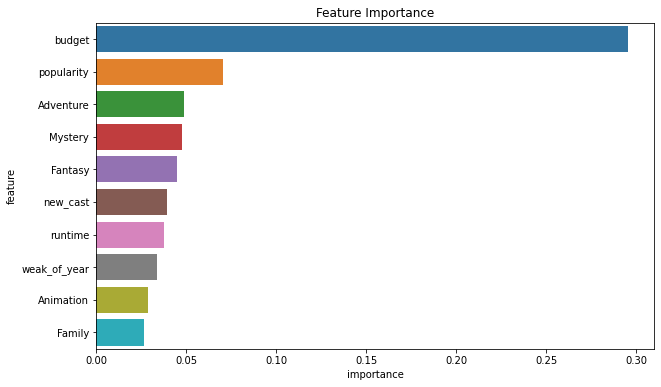

In [98]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Using Hyperparameter tuning and K-Fold Validations

In [116]:
from sklearn.model_selection import KFold

In [121]:
def train_and_evaluate(X_train, y_train, X_val, y_val, **params):
    model = XGBRegressor(random_state=35, n_jobs=-1, **params)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    return model, train_score, val_score

In [145]:
def test_params_kfold(n_splits, **params):
    train_score_list, val_score_list, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(train_inputs):
        X_train, train_targets = inputs.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = inputs.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_score, val_score = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_score_list.append(train_score)
        val_score_list.append(val_score)
    print('Train SCORE: {}, Validation SCORE: {}'.format(np.mean(train_score_list), np.mean(val_score_list)))
    return np.mean(train_score_list), np.mean(val_score_list), models

In [131]:
test_params_kfold(5)

[12:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.8542112498015824, Validation SCORE: 0.6488260223923978


(0.8542112498015824, 0.6488260223923978)

In [132]:
def test_param_and_plot_gbm(n_splits, param_name, param_values, **params):
    train_errors, val_errors = [], [] 
    
    for value in param_values:
        newparams = {param_name: value}
        for para in params:
          newparams[para] = params[para]
        train_score, val_score = test_params_kfold(n_splits, **newparams)
        train_errors.append(train_score)
        val_errors.append(val_score)
    print(val_errors)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

**n_estimators**

[12:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.5745147769933212, Validation SCORE: 0.5041444138327432
[12:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:49] WARNING: /workspace/src/object

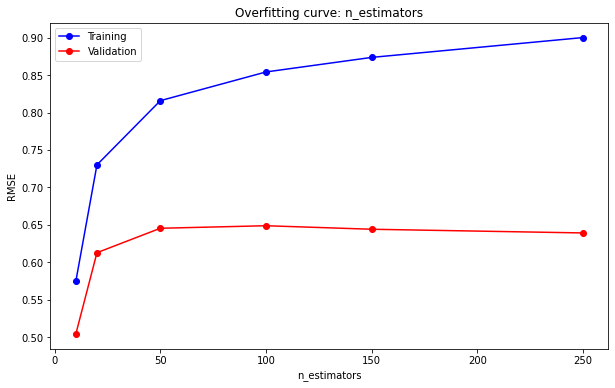

In [135]:
test_param_and_plot_gbm(5, 'n_estimators', [10, 20, 50, 100, 150, 250])

Optimal value for n_estimators is 100

**max_depth**

[12:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.7798848772916757, Validation SCORE: 0.6342546442514475
[12:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:41:39] WARNING: /workspace/src/object

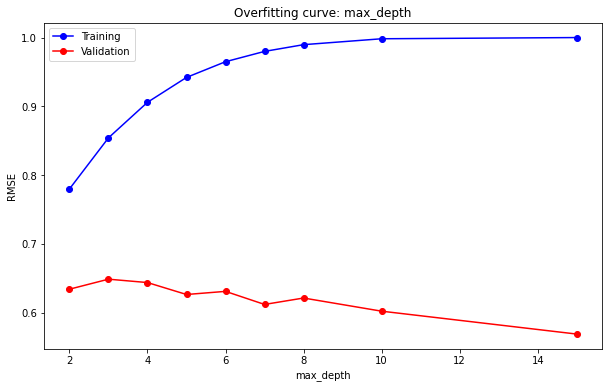

In [136]:
test_param_and_plot_gbm(5, 'max_depth', [2, 3, 4, 5, 6, 7, 8, 10, 15], n_estimators = 100)

optimal parameter for max_depth = 3

**min_child_weight**

[12:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.8542112498015824, Validation SCORE: 0.6488260223923978
[12:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:37] WARNING: /workspace/src/object

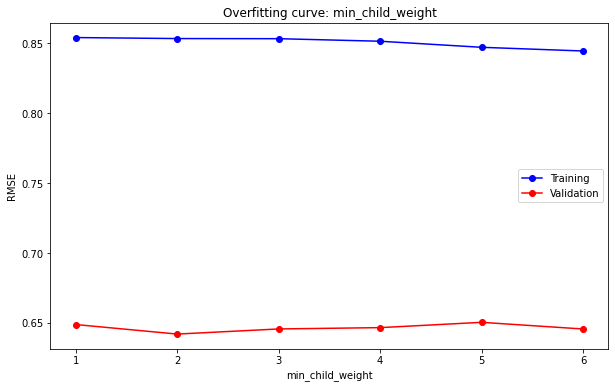

In [138]:
test_param_and_plot_gbm(5, 'min_child_weight', [1, 2, 3, 4, 5, 6,], max_depth = 3, n_estimators = 100)

Optimal value of min_child_weight is 5

**subsample**

[12:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.777606718607936, Validation SCORE: 0.6348693676988993
[12:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:49:29] WARNING: /workspace/src/objecti

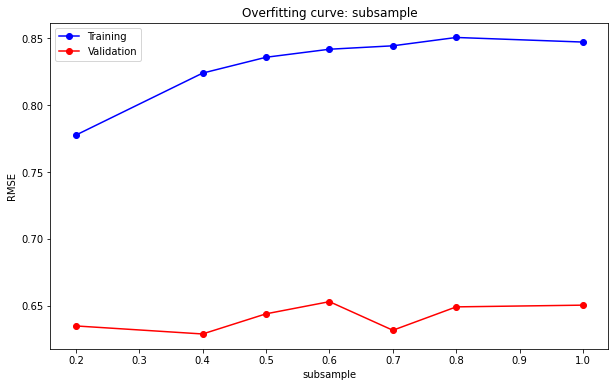

In [140]:
test_param_and_plot_gbm(5, 'subsample', [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1], max_depth = 3, n_estimators = 100, min_child_weight = 5)

Optimal value for subsample is 0.6 

**learning_rate**

[12:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.8418759899686254, Validation SCORE: 0.6530298691927945
[12:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:52:48] WARNING: /workspace/src/object

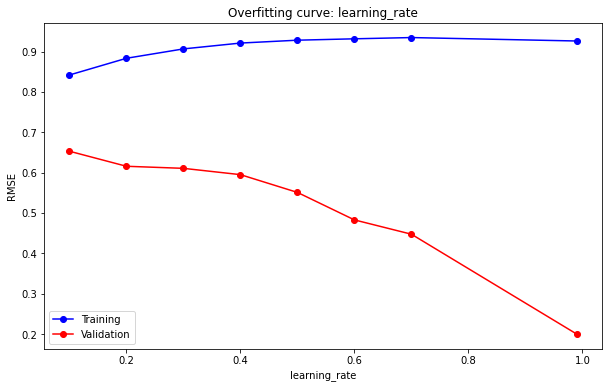

In [142]:
test_param_and_plot_gbm(5, 'learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.99], max_depth = 3, n_estimators = 100, min_child_weight = 5, subsample = 0.6)

Optimal value for learning_rate = 0.1

Using booster, whether linear model for each iteration will give a better accuracy

In [151]:
test_params_kfold(5, booster='gblinear')

[13:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.08378666082868165, Validation SCORE: 0.07876310100115384


(0.08378666082868165,
 0.07876310100115384,
 [XGBRegressor(booster='gblinear', n_jobs=-1, random_state=35),
  XGBRegressor(booster='gblinear', n_jobs=-1, random_state=35),
  XGBRegressor(booster='gblinear', n_jobs=-1, random_state=35),
  XGBRegressor(booster='gblinear', n_jobs=-1, random_state=35),
  XGBRegressor(booster='gblinear', n_jobs=-1, random_state=35)])

it give us a validation score off 0.0787 which is very less 

Putting it all together

In [146]:
final_train_score, final_val_score, final_models = test_params_kfold(5, learning_rate = 0.1, 
                                                                     max_depth = 3, 
                                                                     n_estimators = 100, 
                                                                     min_child_weight = 5, 
                                                                     subsample = 0.6)

[13:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:05:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train SCORE: 0.8418759899686254, Validation SCORE: 0.6530298691927945


In [147]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [148]:
pred_test = predict_avg(final_models, test_inputs)

In [149]:
pred_test

array([1.2477363e+07, 1.9531344e+06, 2.0207082e+07, ..., 4.3049312e+07,
       1.1767266e+08, 1.5607456e+07], dtype=float32)

In [154]:
sample_submission_df['revenue']  = pred_test

In [155]:
sample_submission_df

,id,revenue
0,3001,1.247736e+07
1,3002,1.953134e+06
2,3003,2.020708e+07
3,3004,3.784218e+07
4,3005,-3.763395e+04
...,...,...
4393,7394,9.930023e+07
4394,7395,3.628210e+07
4395,7396,4.304931e+07
4396,7397,1.176727e+08


In [157]:
sample_submission_df.to_csv('./tmdb-box-office-prediction/sample_submission.csv', index=None)

Saving the models

In [158]:
import joblib

In [160]:
box_office_pred = {
    'models': final_models,
    'scaler': scaler,
    'input_cols': input_features,
    'target_col': target_feature,
    'k_fold': 5
}

In [161]:
joblib.dump(box_office_pred, 'house_prices_rf.joblib')

['house_prices_rf.joblib']